# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE = r'SpamData\03_Testing\prob-spam.txt'
TOKEN_HAM_PROB_FILE= r'SpamData\03_Testing\prob-nonspam.txt'
TOKEN_ALL_PROB_FILE= r'SpamData\03_Testing\prob-all-tokens.txt'

TEST_FEATURE_MATRIX = r'SpamData\03_Testing\test-features.txt'
TEST_TARGET_FILE = r'SpamData\03_Testing\test-target.txt'

VOCAB_SIZE = 2500

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter= ' ' )

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter= ' ' )

#Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter= ' ' )
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter= ' ' )
prob_all_tokens= np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter= ' ' )

# Joint Probabaility

In [4]:
# X_test -> the whole array of tokens
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# Joint probabaility -->
# we simply multiply the probability of A times the probability of B, and the reason this formula is so simplistic
# is because we're making a strong assumption here.
# We're assuming the events are independent.

# now we need to multiply all these values together for all the tokens,and that's what we're going to do now.

# Calculating the Joint Probability

### The Dot Product

In [6]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [7]:
# The dot product between A and B would be

a.dot(b)

22

In [8]:
1*0 + 2*5 + 3*4

22

In [9]:
# 2D array

c = np.array([[0,6],[3,0],[5,1]])
print('shape of c is',c.shape )
print(c)

shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [10]:
print(a.dot(c))
print('shape of the dot product is',a.dot(c).shape)

[21  9]
shape of the dot product is (2,)


In [11]:
[1*0 + 2*3 +3*5 , 1*6 + 2*0 +3*1]

[21, 9]

**Challenge**: Can you figure out the dimensions of the dot product between X_test and prob_token_spam? 

In [12]:
X_test.shape

(1724, 2500)

In [13]:
prob_token_spam.shape

(2500,)

In [14]:
print('shape of the dot product is ', X_test.dot(prob_token_spam).shape)

shape of the dot product is  (1724,)


## Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [15]:
# we need to have a sophisticated guess -> prior
# The prior that we care about is our probability of spam.

# which we calculated this probability in our previous notebook.

# The probability of spam that we found was 0.3116
# So let's use that value here as our prior

In [16]:
PROB_SPAM = 0.3116

In [17]:
# since we're working with very, very small numbers that are very close together, in fact, taking the logs 
# will spread out our values a bit.

# And this will make our graphs and plots a lot prettier and easier to interpret when we create them later

# on as part of this project.

#how? np.log

**Challenge**: Do you recall how to take the log of a numpy array? Calculate the log probabilities of the tokens given that the email was spam. This was stored in prob_token_spam. 

In [18]:
# these are our log probabailities
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format

In [19]:
# we're going to combine the joint probability and the conditional probability.
# We're going to calculate the probability that an email is spam given the tokens and we'll do this for
# all the emails in our testing data set

In [20]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [21]:
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

**Challenge**: Calculate the log probability that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [22]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [23]:
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

In [24]:
joint_log_ham.size

1724

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

**Challenge**: Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store your results in a variable called `prediction`.

In [25]:
prediction = joint_log_spam > joint_log_ham

In [26]:
# last five results
prediction[-5:]*1    #convert boolean to int -> *1

array([1, 0, 0, 0, 0])

In [27]:
#Actual label/ Actual classification -> the lats five are non-spam emails
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [28]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

## Accuracy

we've built the Naive based classifier from scratch and we've trained it and classified our emails in our

testing dataset. but we don't know yet if our model is doing a good job or a bad job

first thing to check is how many emails were actually classified correctly, 
what is the fraction of the predictions that our model got right 

In [29]:
# how many email our model classified correctly and incorrectly?
correct_doc = (y_test == prediction).sum()
print('Docs Classified Correctly',correct_doc)

numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs Classified Inorrectly',numdocs_wrong) # misclassified 39 of them

Docs Classified Correctly 1685
Docs Classified Inorrectly 39


### Accuraccy = Nr. of correct predictions/Total Nr. of predictions

In [30]:
# Accuracy

correct_doc/len(X_test)

0.9773781902552204

In [31]:
fraction_wrong = numdocs_wrong /len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%} '.format(1-fraction_wrong))

Fraction classified incorrectly is 2.26%
Accuracy of the model is 97.74% 


## Visualising the Results

In [32]:
# the joint conditional probability that an email is spam versus,
# the joint conditional probability that an email is legitimate.

In [33]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000) #create some data for a line(diagonal line)

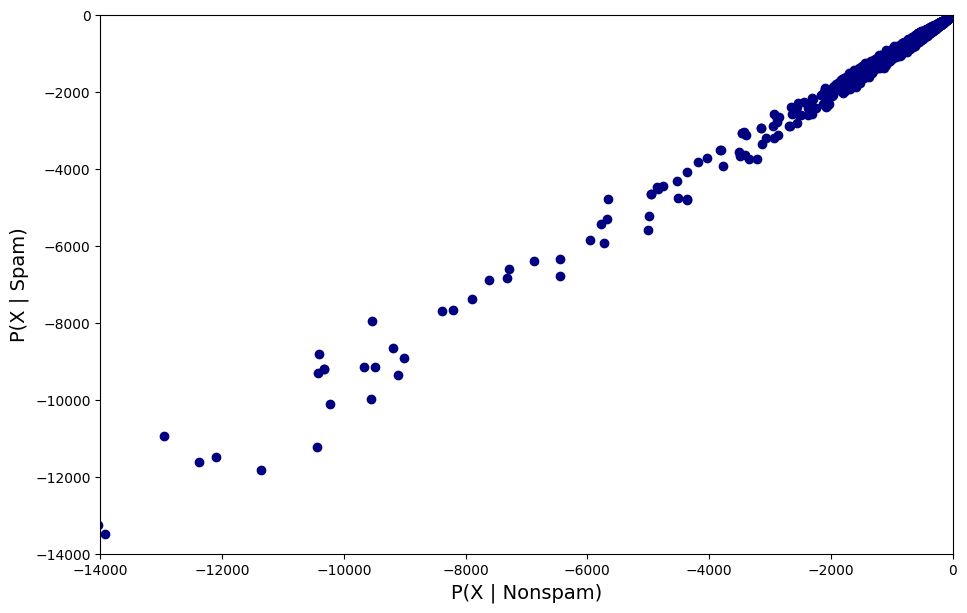

In [34]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision Boundary

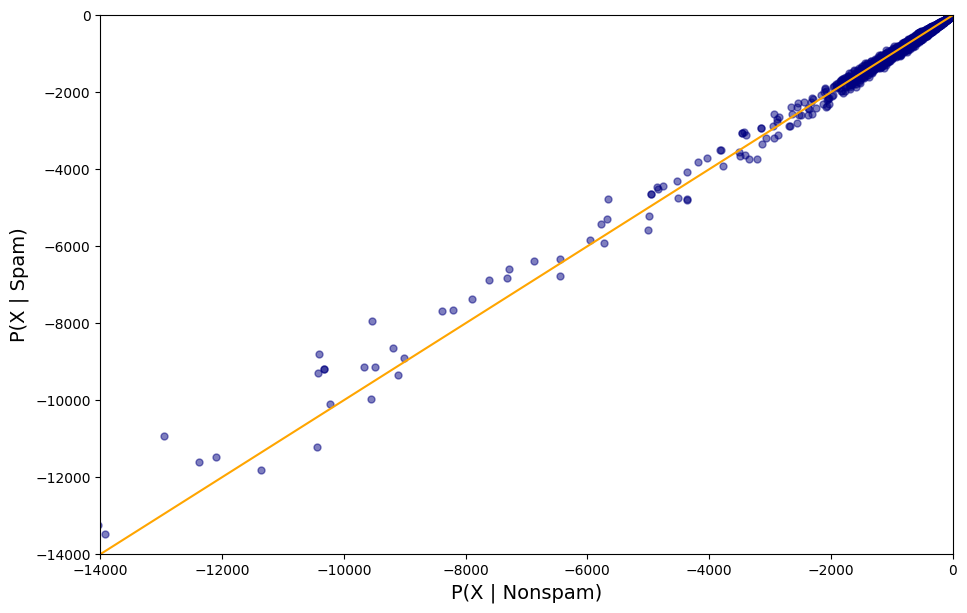

In [35]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [36]:
#problem ->overplotting problem 
# what we can do? side by side chart have a zoom version. Transparancy.dot size

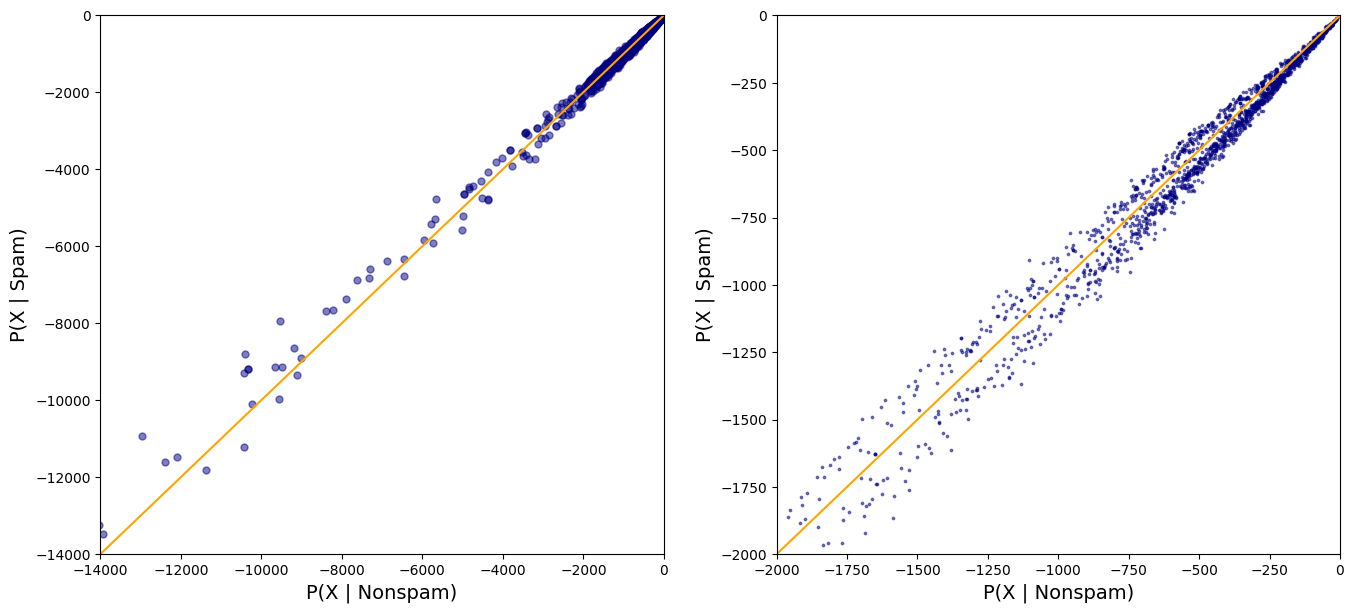

In [37]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [38]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

,P(X | Spam),P(X | Nonspam),Actual Category
0,-1220.375048,-1305.631897,1.0
1,-262.916604,-276.091087,1.0
2,-411.414332,-469.977331,1.0
3,-1473.149497,-1550.046092,1.0
4,-1240.048427,-1314.372826,1.0
...,...,...,...
1719,-1997.356471,-2109.338317,0.0
1720,-875.884997,-787.172374,0.0
1721,-4803.193874,-4367.579453,0.0
1722,-200.684051,-190.842351,0.0


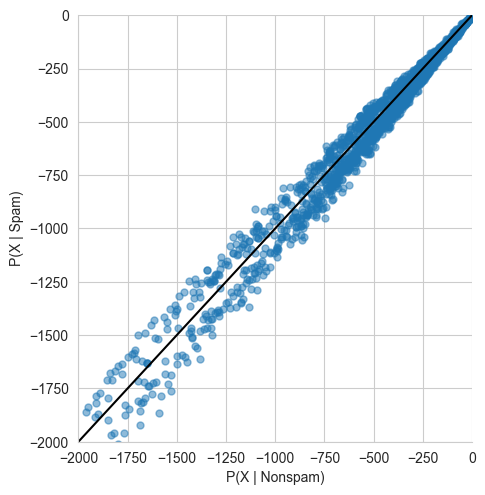

In [39]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False,
          scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

sns.plt.show()

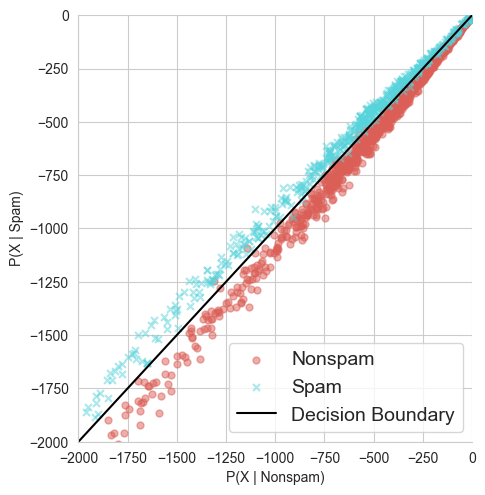

In [44]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Nonspam', 'Spam','Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

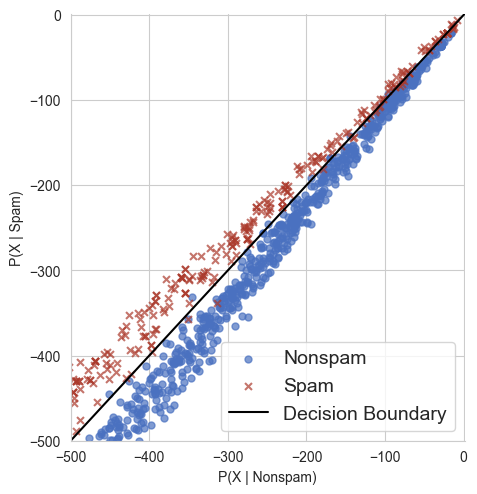

In [45]:
my_colours = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df,fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(( 'Nonspam', 'Spam','Decision Boundary'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [47]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [48]:
# for make an element by element comparison use -> & element
# So in this case, we've got a bitwise and operator, not the boolean and operator.
true_pos = (y_test == 1) & (prediction == 1)

In [49]:
true_pos.sum()

569

**Challenge:** Create a numpy array that measures the False Positives for each datapoint. Call this variable ```false_pos```. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called ```false_neg```

In [51]:
# our prediction was spam, But actually we had a non spam message.
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

19

In [53]:
# an email was actually spam but  our prediction was that it is a non spam e-mail.
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## Recall Score or Sensitivity

True positive / (True positive + False Negative)

**Challenge:** Calculate the recall score. Store it in a variable called ```recall_score```. Print the value of the recall score as a percentage rounded to two decimal places.

In [61]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
recall_score

0.966044142614601

In [62]:
print('Recall Score is: {:.2%}'.format(recall_score))

Recall Score is: 96.60%


In [ ]:
#  a weakness of the accuracy metric was when we were dealing with unbalanced data sets.-> misleading high accuracy metrics

## Precision or positive predicted values

True Positives / (True positives + False positives) 

-  False Positive -> non spam messages that are in spam folder
- a high precision relates to a low false positive rate.

In [ ]:
# there's a trade off between precision and recall

In [ ]:
# if we label every email a spam, our model suffers from low precision.

# And conversely, if we have fewer false positives, then we are not classifying legitimate emails,spam, 
# and we have higher precision.


**Challenge:** Calculate the precision of our naive bayes model. Store the result in a variable called ```precision_score```. Print out the precision as a decimal number rounded to three decimal places. 

In [63]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
precision_score

0.967687074829932

In [64]:
print('Precision Score is: {:.3%}'.format(precision_score))

Precision Score is: 96.769%


## F-Score or F1 Score

In [ ]:
# we want high precision and high recall -> F1 Score

In [67]:
f1_score = 2*  (precision_score * recall_score)  / (precision_score + recall_score)
print ('F Score is {:.2} '.format(f1_score))

F Score is 0.97 


In [ ]:
# F1 score is the harmonic average, the harmonic means of precision and recall.

In [ ]:
# it always has a value between zero and one